# Fitzugh-Nagumo model

### model is described using two variables v and w.

## ${v}' = {v} -{v}^{3}/3 - {w} + {I} $


## ${w}' = {\epsilon}({b_{0}}+ {b_{1}{v}} - {w} )  $

### Here we are taking v as var1 and w as var2 in the code

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Given previous state and model parameters get next state
# Run the dynamical system equations 1 discrete time step
def get_next_state(prev_state,model_params,dt):
    I,b0,b1,eps = model_params
    curr_state = np.zeros(2)
    curr_state[0] = prev_state[0] + dt*(prev_state[0] - (prev_state[0]**3)/3 - prev_state[1] + I)
    curr_state[1] = prev_state[1] + dt*eps*(b0 + b1*prev_state[0] - prev_state[1])
    return curr_state

In [45]:
# get all values of var2 for the given range of var1 when d (var1)/dt = 0
def get_var1_nullcline(model_params,var1_range):
    I,b0,b1,eps = model_params
    var1_nullcline = np.zeros(len(var1_range))
    for i in range(len(var1_range)):
        var1_nullcline[i] = (var1_range[i] - (var1_range[i]**3/3) + I)
    return var1_nullcline

In [51]:

# get all values of var2 for the given range of var1 when d (var2)/dt = 0
def get_var2_nullcline(model_params,var1_range):
    I,b0,b1,eps = model_params
    var2_nullcline = np.zeros(len(var1_range))
    for i in range(len(var1_range)):
        var2_nullcline[i] = b0 + b1*var1_range[i]
    return var2_nullcline

In [52]:
def plot_nullclines_trajectory(states,params,range1,range2,tstop,dt):
    # Create a figure with two pairs of axes for phase plot and time plot
    fig = plt.figure(figsize = [20,10])
    phax = fig.add_axes([.075,.1,.4,.8])
    timax = fig.add_axes([.55,.1,.4,.8])

    # Display nullcline and trajectory of neuron in phase space
    phax.plot(range1,get_var1_nullcline(params,range1),color='darkorange',linewidth=3,label='v-nullcline')
    phax.plot(range1,get_var2_nullcline(params,range1),color='darkgreen',linewidth=3,label='w-nullcline')
    phax.plot(states[:,0],states[:,1],color='slateblue',linewidth=3,label='neuron trajectory')

    # Display trajectory of var1 and var2 with time
    timax.plot(np.arange(0,tstop,dt),states[:,0],color='slateblue',linewidth=3,label='v')
    timax.plot(np.arange(0,tstop,dt),states[:,1],color='maroon',linewidth=3,label='w')

    # Set legends and other graph parameters
    phax.set_xlabel('v')
    phax.set_ylabel('w')
    timax.set_xlabel('Time')
    timax.set_ylabel('v/w')
    phax.set_xlim(min(range1),max(range1))
    phax.set_ylim(min(range2),max(range2))
    phax.legend(loc=0)
    timax.legend(loc=0)
    plt.show()


In [53]:
def get_states(states,params,dt):
    # Get sequence of neuron states
    for i in range(1,states.shape[0]):
        states[i] = get_next_state(states[i-1],params,dt)
    return states

In [54]:
tstop = 100 # time to simulate
dt = 0.1 #ms discrete time step
#define range of var1 and var2 to display
range1 = np.arange(-5,5,.1)
range2 = np.arange(-5,5,.1)
# Each state is a pair (var1,var2) describing current value of DE variables
#      d (var1)/dt = f(var1, var2)
#      d (var2)/dt =  g(var1,var2)
states = np.zeros((int(tstop/dt),2))

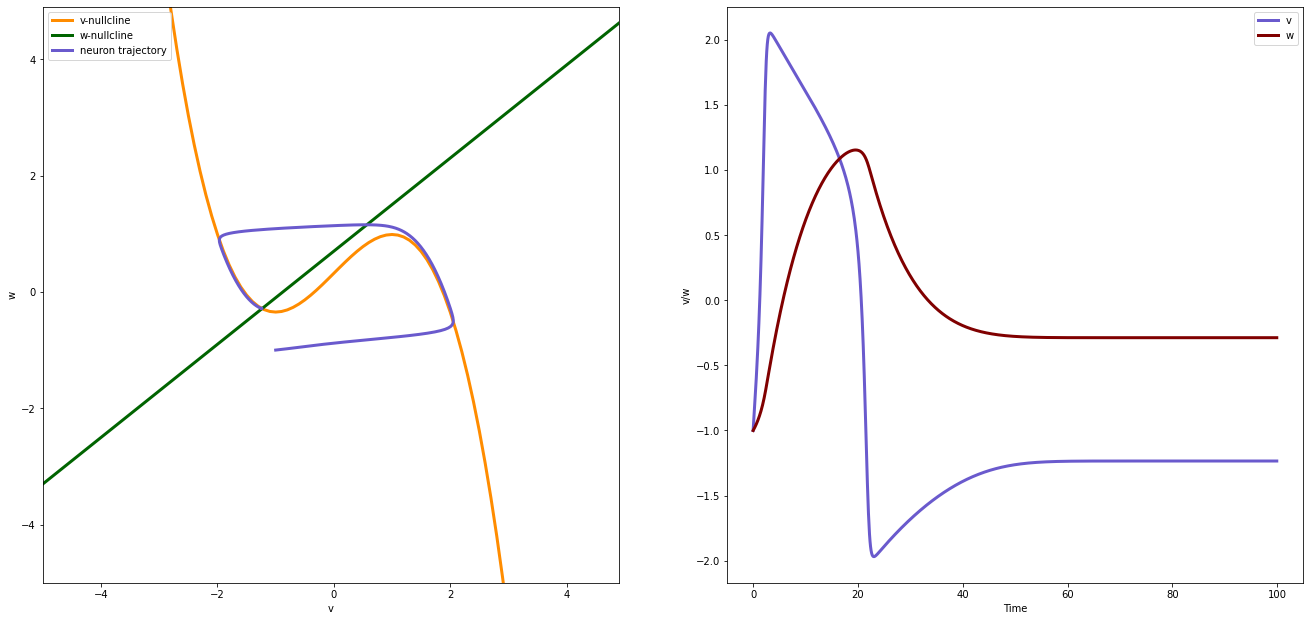

In [55]:
# Initialise model parameters
params = [0.32,0.7,0.8,0.08]#I,b0,b1,eps for fitzhugh-nagumo model
# Initialise neuron state
states[0] = [-1,-1]
states = get_states(states,params,dt)
# Plot nullclines and trajectory of neuron in phase space
plot_nullclines_trajectory(states,params,range1,range2,tstop,dt)